# Civitta default task

In [1]:
import pandas as pd
import numpy as np
import os
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
# from warnings import filterwarnings

# filterwarnings("ignore")

In [2]:
from civitta.data_loader import DataLoader

df_raw = DataLoader().load()
df_raw.head()

clientid client_type     ratio  loan_type  loan_initial_term  \
0         0     default  1.166667  leaseback                 36   
1         1     default  1.027778  leaseback                 54   
2         2     default  0.916667    leasing                 18   
3         3     default  0.916667  leaseback                 36   
4         4     default  0.888889    leasing                 54   

   loan_initial_amount  loan_to_value_ratio  annual_percentage_rate  \
0                 1920             0.200000               35.875763   
1                 5040             0.777778               36.079749   
2                 2400             0.454545               42.292028   
3                 9360             0.886364               35.580055   
4                 5760             0.750000               37.090166   

   monthly_interest_rate    region    branch client_gender  income  \
0                  3.374  region 9  branch 3          male    1214   
1                  3.374       NaN  branch 3          male       0   
2                  3.374  region 2  branch 5          male     720   
3                  3.374       NaN  branch 3        female       0   
4                  3.374  region 6  branch 2          male       0   

   vehicle_production_year  vehicle_initial_assessment_value   age  \
0                     2002                              9600  37.0   
1                     1995                              6480  36.0   
2                     1999                              5280  57.0   
3                     2000                             10560  65.0   
4                     2008                              7680  35.0   

   had_car_loan  had_other_loans  
0             0                0  
1             0                0  
2             0                0  
3             0                0  
4             0                0

### EDA

In [55]:
ProfileReport(df_raw, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df_plotting = df_raw[df_raw["client_type"].isin(["default", "regular"])].drop(columns="clientid").reset_index(drop=True).copy()

In [5]:
df = df_raw.copy()
df.dropna(inplace=True)

sns.pairplot(df, hue="client_type")
plt.show()

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pawel/Desktop/civitta_task/ven

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7be10f4863b0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [11]:
df_raw.head()

clientid client_type     ratio  loan_type  loan_initial_term  \
0         0     default  1.166667  leaseback                 36   
1         1     default  1.027778  leaseback                 54   
2         2     default  0.916667    leasing                 18   
3         3     default  0.916667  leaseback                 36   
4         4     default  0.888889    leasing                 54   

   loan_initial_amount  loan_to_value_ratio  annual_percentage_rate  \
0                 1920             0.200000               35.875763   
1                 5040             0.777778               36.079749   
2                 2400             0.454545               42.292028   
3                 9360             0.886364               35.580055   
4                 5760             0.750000               37.090166   

   monthly_interest_rate    region    branch client_gender  income  \
0                  3.374  region 9  branch 3          male    1214   
1                  3.374       NaN  branch 3          male       0   
2                  3.374  region 2  branch 5          male     720   
3                  3.374       NaN  branch 3        female       0   
4                  3.374  region 6  branch 2          male       0   

   vehicle_production_year  vehicle_initial_assessment_value   age  \
0                     2002                              9600  37.0   
1                     1995                              6480  36.0   
2                     1999                              5280  57.0   
3                     2000                             10560  65.0   
4                     2008                              7680  35.0   

   had_car_loan  had_other_loans  
0             0                0  
1             0                0  
2             0                0  
3             0                0  
4             0                0

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10970 entries, 0 to 10969
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   clientid                          10970 non-null  int64  
 1   client_type                       10970 non-null  object 
 2   ratio                             8389 non-null   float64
 3   loan_type                         10970 non-null  object 
 4   loan_initial_term                 10970 non-null  int64  
 5   loan_initial_amount               10970 non-null  int64  
 6   loan_to_value_ratio               10970 non-null  float64
 7   annual_percentage_rate            10970 non-null  float64
 8   monthly_interest_rate             10970 non-null  float64
 9   region                            9880 non-null   object 
 10  branch                            10970 non-null  object 
 11  client_gender                     10970 non-null  object 
 12  inco

In [92]:
df_raw[df_raw["client_type"] == "default"].describe()

clientid       ratio  loan_initial_term  loan_initial_amount  \
count  1307.000000  211.000000        1307.000000          1307.000000   
mean    653.000000    0.323283          66.629686          6621.399388   
std     377.442711    0.238788          26.646526          4093.208991   
min       0.000000    0.000000           9.000000          1680.000000   
25%     326.500000    0.133333          54.000000          4080.000000   
50%     653.000000    0.266667          54.000000          5760.000000   
75%     979.500000    0.465278          90.000000          7680.000000   
max    1306.000000    1.166667         180.000000         28800.000000   

       loan_to_value_ratio  annual_percentage_rate  monthly_interest_rate  \
count          1307.000000             1307.000000            1307.000000   
mean              0.691552               35.688007               3.225134   
std               0.211620                2.337609               0.293400   
min               0.061856               21.705606               2.530500   
25%               0.599342               35.129818               3.374000   
50%               0.746269               36.080893               3.374000   
75%               0.800000               36.928253               3.374000   
max               5.833333               47.497034               3.374000   

             income  vehicle_production_year  \
count   1307.000000              1307.000000   
mean    1051.367253              2001.968630   
std     1432.818089                 4.703271   
min        0.000000              1991.000000   
25%        0.000000              1998.000000   
50%      960.000000              2002.000000   
75%     1440.000000              2005.000000   
max    24000.000000              2016.000000   

       vehicle_initial_assessment_value          age  had_car_loan  \
count                       1307.000000  1305.000000   1307.000000   
mean                        9819.066565    38.356322      0.104820   
std                         6352.211288    12.039280      0.306439   
min                         2160.000000    21.000000      0.000000   
25%                         5880.000000    29.000000      0.000000   
50%                         7920.000000    36.000000      0.000000   
75%                        11520.000000    45.000000      0.000000   
max                        62400.000000    72.000000      1.000000   

       had_other_loans  
count      1307.000000  
mean          0.102525  
std           0.303453  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

In [77]:
df_raw["ratio"].isnull().groupby(df_raw["client_type"]).sum()

client_type
default    1096
early        54
regular    1431
Name: ratio, dtype: int64

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pawel/Desktop/civitta_task/ven

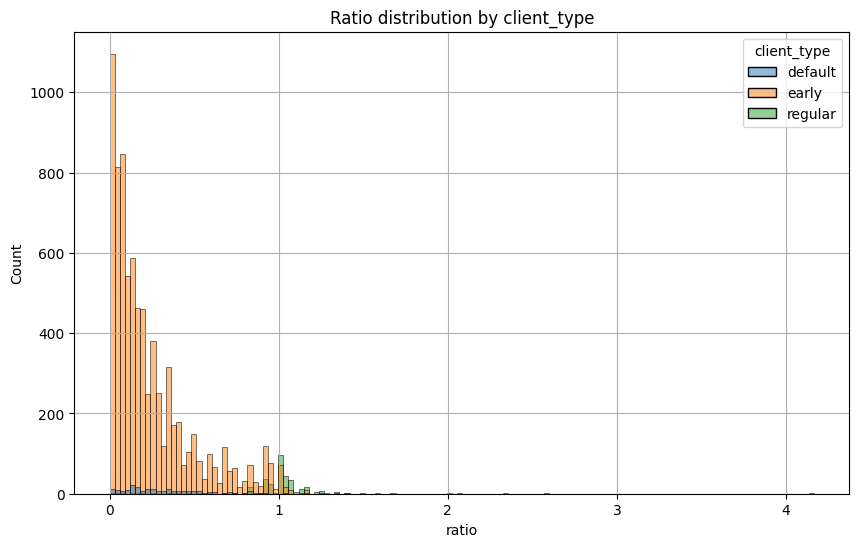

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(x='ratio', hue='client_type', data=df_raw)
plt.title('Ratio distribution by client_type')
plt.grid()
plt.show()

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pawel/Desktop/civitta_task/ven

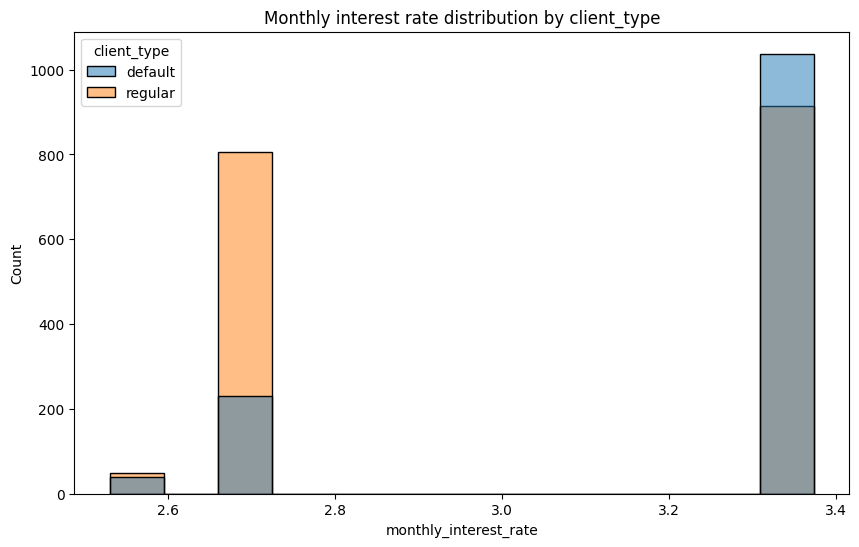

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(x='monthly_interest_rate', hue='client_type', data=df_plotting)
plt.title('Monthly interest rate distribution by client_type')
plt.show()

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/pawel/Desktop/civitta_task/ven

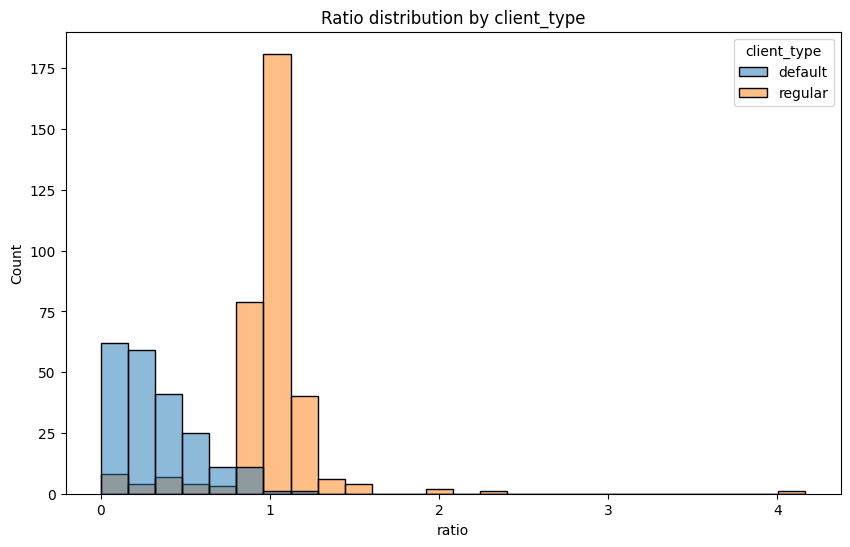

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(x='ratio', hue='client_type', data=df_plotting)
plt.title('Ratio distribution by client_type')
plt.show()

In the dataset we have a three types of clients: early, regular and default. Early clients are majority group, but is not significant in our task. Our task is to detect default clients. To decreace complexity of the model from multiclass classification to binary classification, we can take two group: default and regular. When we look at quantities of samples representing each group they are similar.
Client type quantity samples:
- early: 7892 samples
- regular: 1771 samples
- default: 1307 samples
- 
Ratio feature distribution for regular and default clients 

When we compare two types of client regular and defaults. Usually regular clients have higher ratio than default clients. Neverthelles when we add early clients for this comparision, we can see that ratio is close to zero for them.
On kernel density distribution we can see that default client has hiher monthly interest rates than regular clients. 



In [58]:
df_raw[~(df_raw["ratio"].notnull())]["client_type"].value_counts()

client_type
regular    1431
default    1096
early        54
Name: count, dtype: int64

In [28]:
df_raw[(df_raw["ratio"].notnull()) & (df_raw["client_type"] != "early")].groupby("client_type")["ratio"].mean()

client_type
default    0.323283
regular    0.993798
Name: ratio, dtype: float64

In [30]:
df_plotting.groupby(["client_type", "loan_type"]).count()["loan_initial_term"]

client_type  loan_type
default      leaseback    1042
             leasing       265
regular      leaseback    1524
             leasing       247
Name: loan_initial_term, dtype: int64

In [45]:
df_plotting.describe()

ratio  loan_initial_term  loan_initial_amount  \
count  551.000000        3078.000000          3078.000000   
mean     0.737031          62.232294          5952.168291   
std      0.430852          26.687170          3846.264823   
min      0.000000           9.000000          1680.000000   
25%      0.333333          36.000000          3456.000000   
50%      0.916667          54.000000          4800.000000   
75%      1.000000          90.000000          7200.000000   
max      4.166667         180.000000         69120.000000   

       loan_to_value_ratio  annual_percentage_rate  monthly_interest_rate  \
count          3078.000000             3078.000000            3078.000000   
mean              0.661389               35.353343               3.113067   
std               0.201163                2.824443               0.344611   
min               0.061856               20.839618               2.530500   
25%               0.555556               33.821773               2.671083   
50%               0.714286               35.832428               3.374000   
75%               0.800000               36.845542               3.374000   
max               5.833333               50.988071               3.374000   

             income  vehicle_production_year  \
count   3078.000000              3078.000000   
mean    1018.143925              2002.157895   
std     1259.497223                 4.695722   
min        0.000000              1982.000000   
25%        0.000000              1999.000000   
50%      960.000000              2002.000000   
75%     1440.000000              2006.000000   
max    24000.000000              2019.000000   

       vehicle_initial_assessment_value          age  had_car_loan  \
count                       3078.000000  3070.000000   3078.000000   
mean                        9281.247563    38.788599      0.124107   
std                         5975.770330    11.994728      0.329757   
min                         1920.000000    19.000000      0.000000   
25%                         5760.000000    29.000000      0.000000   
50%                         7680.000000    36.000000      0.000000   
75%                        10560.000000    46.000000      0.000000   
max                        86400.000000    78.000000      1.000000   

       had_other_loans  
count      3078.000000  
mean          0.141975  
std           0.349082  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

In [15]:
# df_plotting[df_plotting["age"].notnull()][["client_type", "age"]].groupby("client_type").mean()
df_plotting[df_plotting["age"].notnull()][["loan_type", "client_type", "age"]].groupby(["loan_type", "client_type"]).mean()

age
loan_type client_type           
leaseback default      38.445192
          regular      39.032216
leasing   default      38.007547
          regular      39.581967

KeyboardInterrupt: 

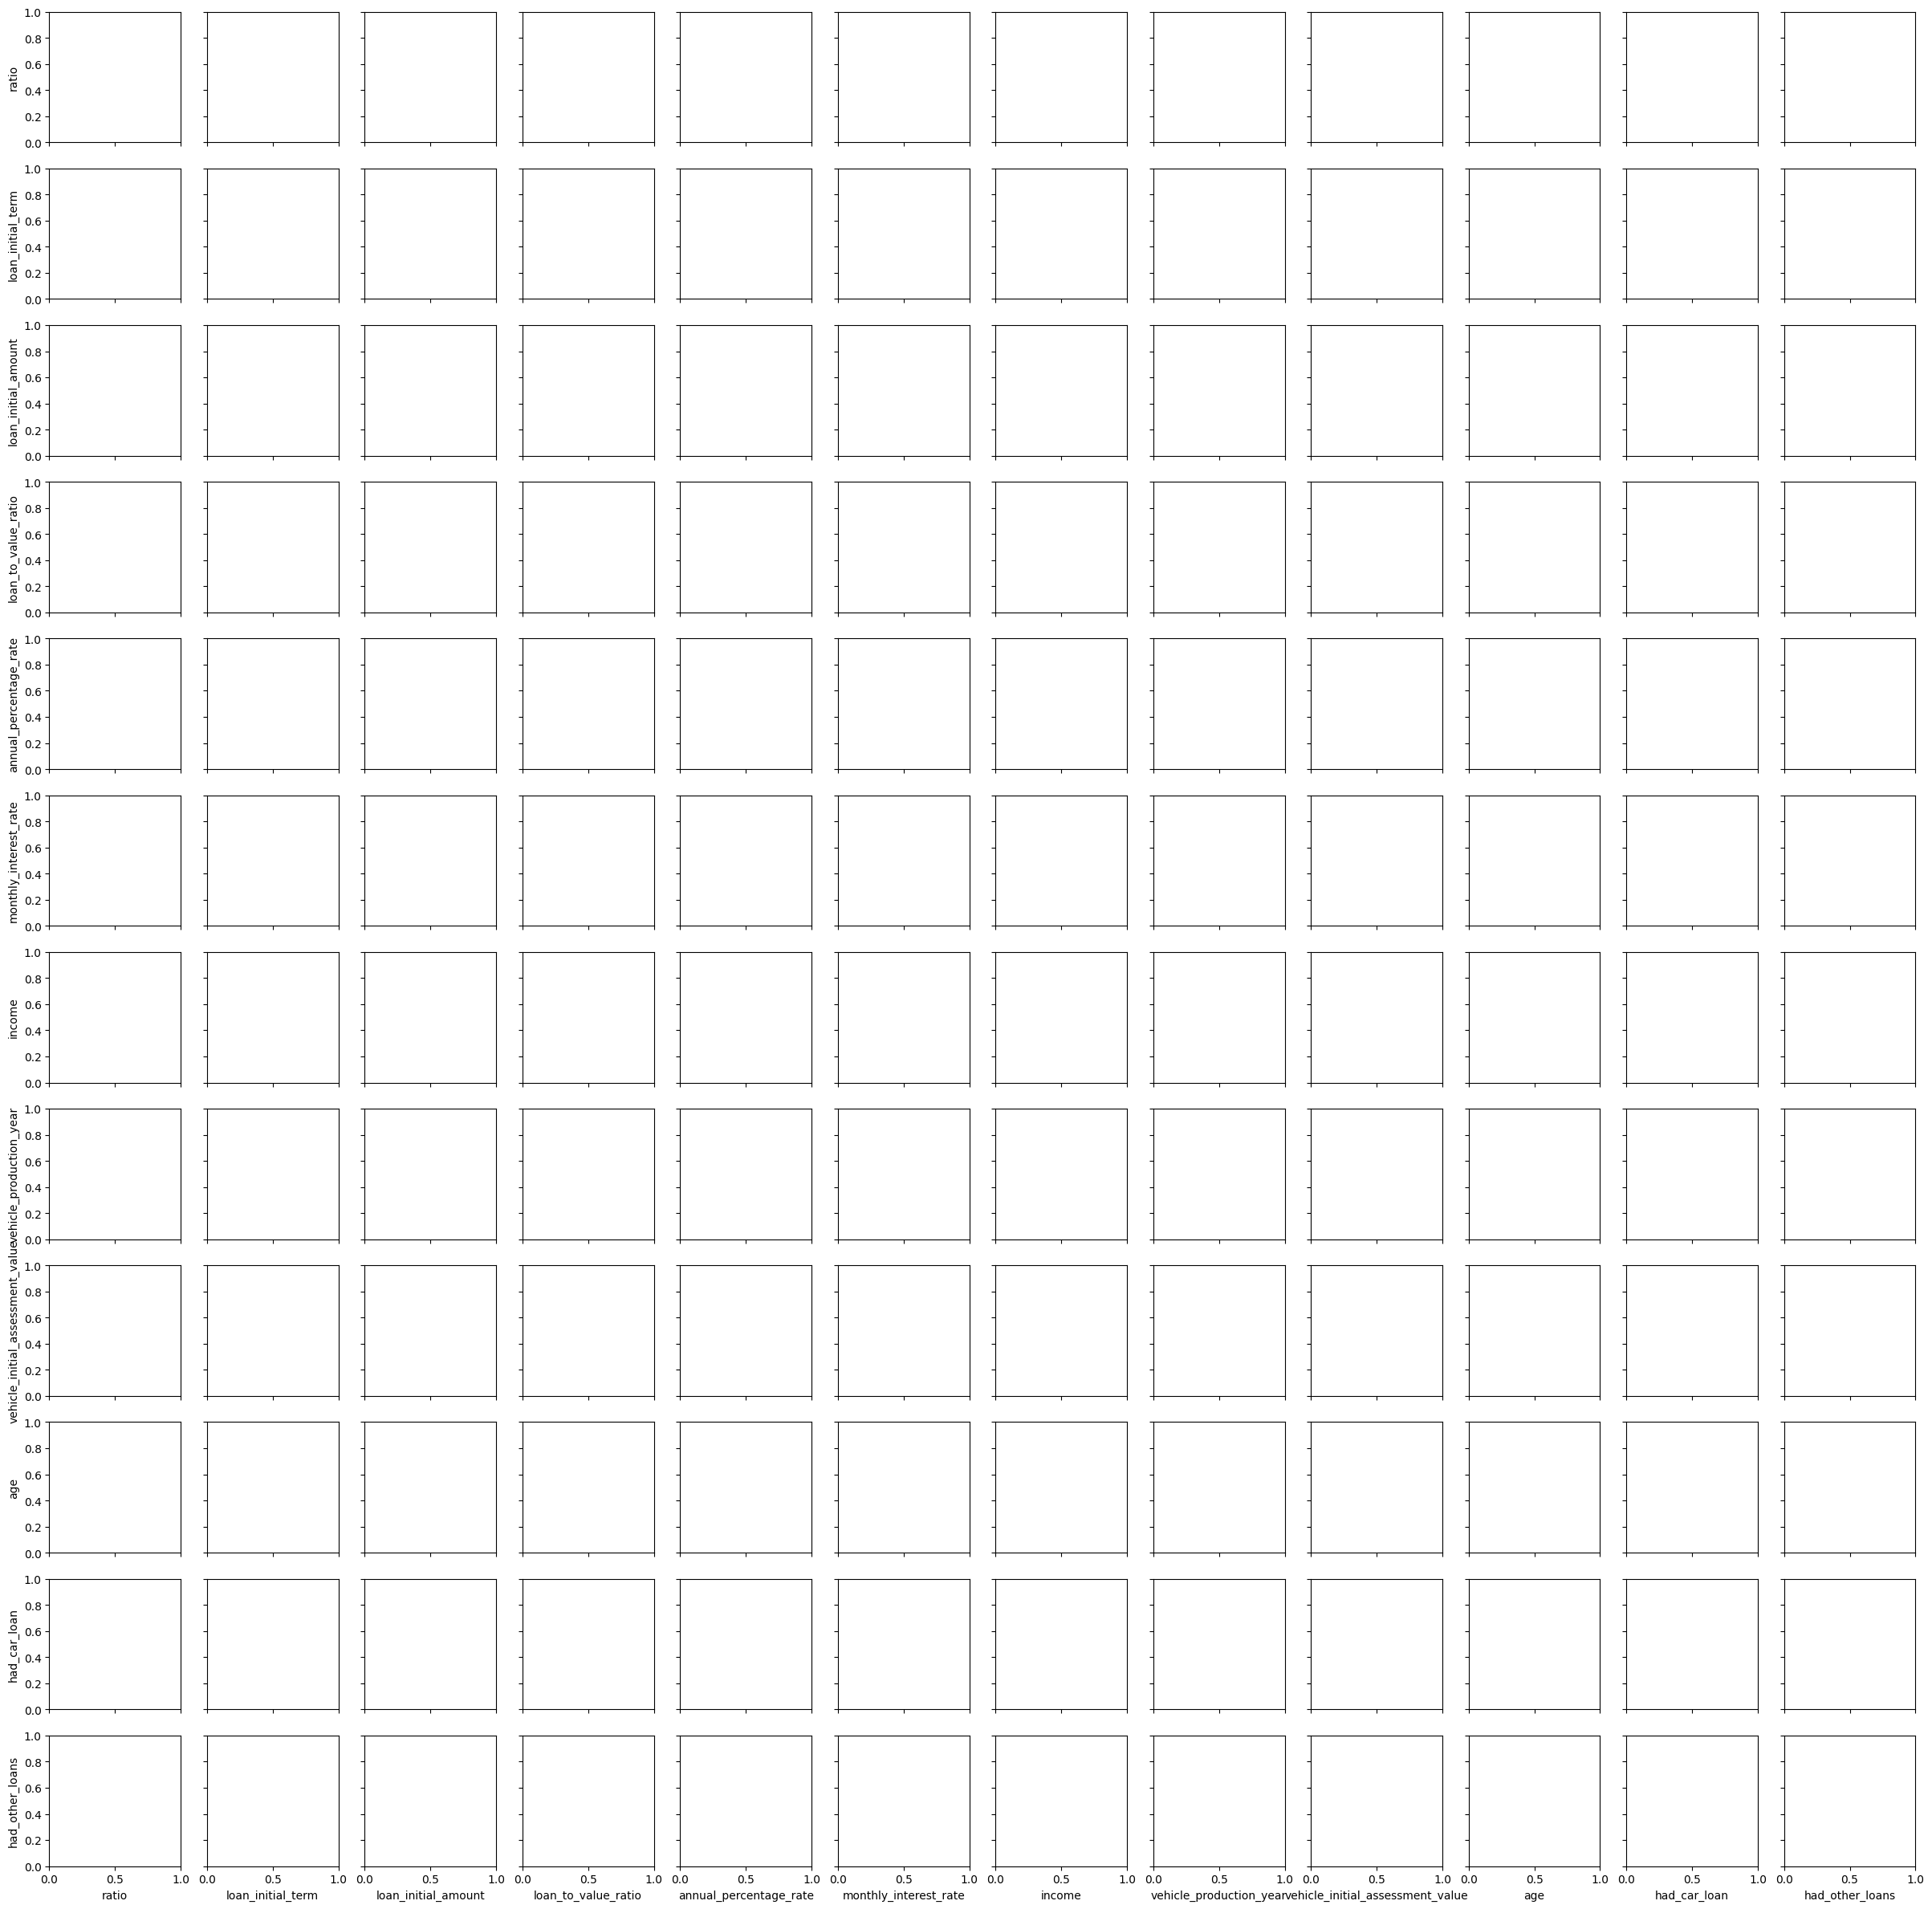

In [16]:
sns.pairplot(data=df_plotting[df_plotting["ratio"].notnull()], hue="client_type")
plt.show()

Strategy one vs all is working better than multiclass classification. The main goal of this task is to predict default on client_type column. Other labels like: early and regular we can join into one. Using this strategy we can get binary classification.

In [8]:
df_raw["client_type"].value_counts()

client_type
early      7892
regular    1771
default    1307
Name: count, dtype: int64

In [65]:
# df = df_raw[df_raw["client_type"].isin(["default", "regular"])].reset_index(drop=True).copy()

In [36]:
df_raw[df_raw["region"].isnull()]["client_type"].value_counts()
# df_raw[df_raw["age"].isnull()]["client_type"].value_counts()

client_type
early      799
default    158
regular    133
Name: count, dtype: int64

### Null checks

In [4]:
df_raw.isna().sum()

clientid                               0
client_type                            0
ratio                               2581
loan_type                              0
loan_initial_term                      0
loan_initial_amount                    0
loan_to_value_ratio                    0
annual_percentage_rate                 0
monthly_interest_rate                  0
region                              1090
branch                                 0
client_gender                          0
income                                 0
vehicle_production_year                0
vehicle_initial_assessment_value       0
age                                   22
had_car_loan                           0
had_other_loans                        0
dtype: int64

In [5]:
df_raw[~df_raw["region"].notnull()].client_type.value_counts()

client_type
early      799
default    158
regular    133
Name: count, dtype: int64

In [11]:
df_raw[~df_raw["region"].notnull()]["client_type"].value_counts()

client_type
early      799
default    158
regular    133
Name: count, dtype: int64

In [23]:
df_raw[~df_raw["age"].notnull()]

clientid client_type     ratio  loan_type  loan_initial_term  \
173         173     default  0.116667  leaseback                 90   
1228       1228     default       NaN  leaseback                 90   
1861       1861       early  0.750000  leaseback                 18   
2239       2239       early  0.562500  leaseback                 72   
2487       2487       early  0.500000  leaseback                 18   
2827       2827       early  0.416667    leasing                 36   
4071       4071       early  0.250000  leaseback                 72   
4486       4486       early  0.208333  leaseback                 36   
4490       4490       early  0.208333  leaseback                 36   
5960       5960       early  0.116667  leaseback                 90   
6939       6939       early  0.083333  leaseback                 54   
7163       7163       early  0.066667  leaseback                 90   
7233       7233       early  0.062500  leaseback                 72   
7470       7470       early  0.055556  leaseback                108   
7471       7471       early  0.055556    leasing                108   
8361       8361       early  0.020833  leaseback                 72   
9428       9428     regular  1.000000    leasing                  9   
9452       9452     regular  0.958333  leaseback                 36   
9491       9491     regular  0.916667  leaseback                 18   
9492       9492     regular  0.916667    leasing                 18   
9494       9494     regular  0.916667  leaseback                 18   
10255     10255     regular       NaN    leasing                 90   

       loan_initial_amount  loan_to_value_ratio  annual_percentage_rate  \
173                  11520             0.800000               35.157083   
1228                  6720             0.800000               36.758909   
1861                  1680             0.350000               36.815581   
2239                  3840             0.500000               37.136404   
2487                  1680             0.159091               40.824239   
2827                  2640             0.458333               36.825925   
4071                  3360             0.700000               36.554530   
4486                  1680             0.241379               36.227212   
4490                  2640             0.323529               37.808941   
5960                  5760             0.705882               36.392040   
6939                  5280             0.814815               36.687331   
7163                  5280             0.785714               36.174736   
7233                  2880             0.500000               36.501447   
7470                  4320             0.750000               35.046105   
7471                  9120             0.760000               35.995244   
8361                  8160             0.850000               37.306522   
9428                  3120             0.650000               45.020149   
9452                  4320             0.692308               38.074561   
9491                  2400             0.303030               40.469420   
9492                  2400             0.263158               37.212007   
9494                  2400             0.312500               39.703247   
10255                 6720             0.823529               31.809739   

       monthly_interest_rate    region    branch client_gender  income  \
173                 3.374000       NaN  branch 3          male       0   
1228                3.374000       NaN  branch 5          male       0   
1861                3.374000       NaN  branch 5          male       0   
2239                3.374000       NaN  branch 3          male       0   
2487                3.374000       NaN  branch 3          male       0   
2827                3.374000       NaN  branch 3          male       0   
4071                3.374000       NaN  branch 5          male       0   
4486                3.374000       NaN  branch 5       

### Decision tree regressor to fill missing ratio
I drop age and region null samples

In [28]:
df_imp[~df_imp["ratio"].notnull()].index

Index([  211,   212,   213,   214,   215,   216,   217,   218,   219,   220,
       ...
       10960, 10961, 10962, 10963, 10964, 10965, 10966, 10967, 10968, 10969],
      dtype='int64', length=2581)

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

df_imp = df_raw.copy()
df_imp.dropna(subset=["age", "region"], inplace=True)
y_imp = df_imp[["ratio"]]
imp_columns = df_imp.columns.difference(
    ["ratio", "branch", "client_gender", "client_type", "clientid", "loan_type", "region"]
)

X_imp_train = df_imp[df_imp["ratio"].notnull()][imp_columns]
y_imp_train = df_imp[df_imp["ratio"].notnull()]["ratio"]
X_imp_test = df_imp[~df_imp["ratio"].notnull()][imp_columns]

dtr_imputer = DecisionTreeRegressor(random_state=123)
dtr_imputer.fit(X_imp_train, y_imp_train)
print(r2_score(y_imp_train, dtr_imputer.predict(X_imp_train)))

df_imp.loc[X_imp_test.index, "ratio"] = dtr_imputer.predict(X_imp_test)

0.9999946145964395


Droping null rows with SMOTE or NearMiss is not working.  
Fast, memory efficient Multiple Imputation by Chained Equations (MICE) with lightgbm.
miceforest imputer

Work on features(transform they) and null values.

In [68]:
numerical_features = [
    "ratio", 
    "loan_initial_term", 
    "loan_initial_amount", "loan_to_value_ratio",
    "annual_percentage_rate", "monthly_interest_rate",
    "income", "vehicle_initial_assessment_value", "age"
    ]
nominal_features = [
    "loan_type", "region", "branch", "client_gender"
    ]
ordinal_features = [
    "vehicle_production_year", "had_car_loan", "had_other_loans"
]

target = "client_type"

# null values here: ratio, region, income

In [69]:
df = df_raw.copy()
# df = df.dropna(subset=["age", "region"]).reset_index(drop=True)

In [70]:
df[nominal_features] = df[nominal_features].astype("category")

In [40]:
import miceforest as mf

X_to_impute = df[ordinal_features + numerical_features + nominal_features]

kds = mf.ImputationKernel(
  X_to_impute,
  save_all_iterations=True,
  random_state=123
)

# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
X_imputed = kds.complete_data()

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/miceforest/ImputationKernel.py:370: UserWarning: [region] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


Imputation using mean....

Good results when dropping nulls: age, ratio?

### Data standarization and transformation

In [26]:
df = df_raw.copy()

In [71]:
from civitta.transform_pipeline import TransformationPipeline

transform_pipe = TransformationPipeline()

# nominal data
nominal_data = transform_pipe.nominal_pipeline.fit_transform(df[nominal_features])
nominal_columns = transform_pipe.nominal_pipeline.get_feature_names_out()
X_nominal = pd.DataFrame.sparse.from_spmatrix(nominal_data, columns=nominal_columns)

# ordinal data
ordinal_data = transform_pipe.ordinal_pipeline.fit_transform(df[ordinal_features])
ordinal_columns = transform_pipe.ordinal_pipeline.get_feature_names_out()
X_ordinal = pd.DataFrame(ordinal_data, columns=ordinal_columns)

# numerical data
numerical_data = transform_pipe.numerical_pipeline.fit_transform(df[numerical_features])
numerical_columns = transform_pipe.numerical_pipeline.get_feature_names_out()
X_numerical = pd.DataFrame(numerical_data, columns=numerical_columns)

In [19]:
transform_pipe.ordinal_pipeline.fit_transform(df[["client_type"]])

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]])

In [72]:
X = pd.concat([X_numerical, X_nominal, X_ordinal], axis=1)
# y = transform_pipe.ordinal_pipeline.fit_transform(df[["client_type"]])
y = df["client_type"].apply(lambda x: 1 if x == "default" else 0)

In [71]:
df_imputed = pd.concat([X_numerical, X_nominal, X_ordinal, df["client_type"]], axis=1)
df_dr = df_imputed[df_imputed["client_type"].isin(["default", "regular"])]
df_er = df_imputed[df_imputed["client_type"].isin(["early", "regular"])]

In [72]:
X_dr = df_dr.loc[:, df_dr.columns != "client_type"]
y_dr = df_dr["client_type"].apply(lambda x: 1 if x == "default" else 0)

In [57]:
y_dr.value_counts()

client_type
0    294
1    184
Name: count, dtype: int64

In [58]:
X_er = df_er.loc[:, df_er.columns != "client_type"]
y_er = df_er["client_type"].apply(lambda x: 1 if x == "early" else 0)

In [59]:
y_er.value_counts()

client_type
1    7040
0     294
Name: count, dtype: int64

### K-means

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFram

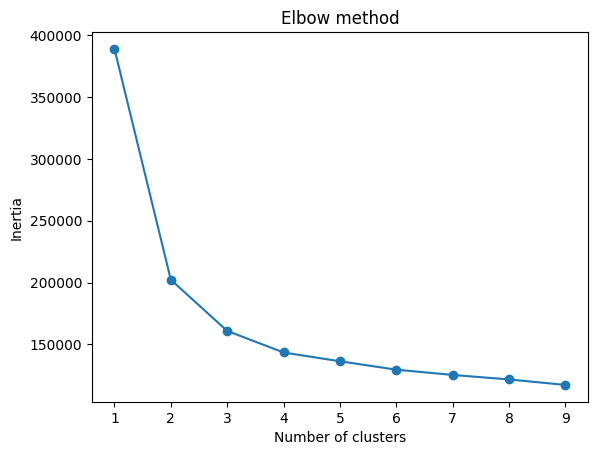

In [10]:
from sklearn.cluster import KMeans

# elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

Based on elbow method computed in k-means algorithm, we can see that even two groups represents dataset and decrease inertia.

In [60]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

seed = 123
X_er_train, X_er_test, y_er_train, y_er_test = train_test_split(
    X_er, y_er, random_state=seed, train_size=0.8
)


rus_er = RandomUnderSampler(random_state=seed)
X_er_train_rus, y_er_train_rus = rus_er.fit_resample(X_er_train, y_er_train)
y_er_train_rus.value_counts()

client_type
0    237
1    237
Name: count, dtype: int64

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_er_clf = RandomForestClassifier(random_state=seed)
rf_er_clf.fit(X_er_train_rus, y_er_train_rus)
rf_er_preds = rf_er_clf.predict(X_er_test)

print(classification_report(y_er_test, rf_er_preds))
ks_roc_auc_er = evaluate_ks_and_roc_auc(y_er_test, rf_er_clf.predict_proba(X_er_test))

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.16      1.00      0.28        57
           1       1.00      0.79      0.88      1410

    accuracy                           0.80      1467
   macro avg       0.58      0.89      0.58      1467
weighted avg       0.97      0.80      0.86      1467

KS: 0.7872 (p-value: 3.250e-36)
ROC AUC: 0.8936


/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [49]:
print(confusion_matrix(y_er_test, rf_er_preds))

[[  57    0]
 [ 300 1110]]


In [ ]:
X_dr_train_smote

In [74]:
X_dr_train, X_dr_test, y_dr_train, y_dr_test = train_test_split(
    X_dr, y_dr, random_state=seed, train_size=0.8
)

rus_dr = RandomUnderSampler(random_state=seed)
X_dr_train_rus, y_dr_train_rus = rus_dr.fit_resample(X_dr_train, y_dr_train)
y_dr_train_rus.value_counts()
# smote_dr = SMOTE(random_state=seed)
# X_dr_train_smote, y_dr_train_smote = smote_dr.fit_resample(X_dr_train, y_dr_train)
# y_dr_train_smote.value_counts()

client_type
0    145
1    145
Name: count, dtype: int64

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_dr_clf = RandomForestClassifier(random_state=seed)
rf_dr_clf.fit(X_dr_train_rus, y_dr_train_rus)
rf_dr_preds = rf_dr_clf.predict(X_dr_test)

print(classification_report(y_dr_test, rf_dr_preds))
ks_roc_auc_dr = evaluate_ks_and_roc_auc(y_dr_test, rf_dr_clf.predict_proba(X_dr_test))

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        39

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

KS: 1.0000 (p-value: 1.667e-27)
ROC AUC: 1.0000


/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [67]:
import shap

explainer = shap.Explainer(rf_dr_clf)
shap_values = explainer.shap_values(X_dr_test)
shap.summary_plot(shap_values, X_dr_test)

NameError: name 'rf_dr_clf' is not defined

In [95]:
print(confusion_matrix(y_dr_test, rf_dr_preds))

[[54  3]
 [ 5 34]]


In [45]:
from sklearn.model_selection import train_test_split
from collections import Counter

seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed, train_size=0.8
)
y_train.value_counts()
# Counter(y_train.reshape(len(y_train)))

client_type
0    6990
1     913
Name: count, dtype: int64

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=seed)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
# y_train_rus.value_counts()
Counter(y_train_rus)

Counter({0: 913, 1: 913})

In [47]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=seed)
# X_train_ros, y_train_ros = rus.fit_resample(X_train, y_train)
# y_train_ros.value_counts()

client_type
0    913
1    913
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = seed)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts()

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


client_type
0    7742
1    7742
Name: count, dtype: int64

In [48]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)
y_train_miss.value_counts()

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


client_type
0    913
1    913
Name: count, dtype: int64

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_recall_fscore_support, precision_score, f1_score, recall_score, fbeta_score

In [73]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return {"ks_statistic": ks.statistic, "roc_auc": roc_auc}

In [73]:
# import mlflow

# mlflow.set_experiment("civitta_task")
# mlflow.sklearn.autolog()

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier


train_pair = [(X_train, y_train, "simple_train"), 
              (X_train_rus, y_train_rus, "random under sampling"),
              # (X_train_ros, y_train_ros, "random over sampling"), 
              (X_train_sm, y_train_sm, "smote")]
              # (X_train_miss, y_train_miss, "near miss")]

for X_train, y_train, pair_str in train_pair:
    rf_clf = RandomForestClassifier(random_state=seed)
    # ovo_clf = OneVsRestClassifier(rf_clf)
    print(pair_str)
    # dataset = mlflow.data.from_pandas(
    #     df_raw, source="data/", name="civitta_default_task", targets="client_type"
    # )
    # mlflow.log_input(dataset, context="raw_dataset")
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    print(classification_report(y_test, rf_preds))
    # prfs_metrics = precision_recall_fscore_support(y_test, rf_preds)
    # prfs_metrics
    # accuracy = accuracy_score(y_test, rf_preds)
    # precision = precision_score(y_test, rf_preds)
    # recall = recall_score(y_test, rf_preds)
    # f1 = f1_score(y_test, rf_preds)
    
    # metrics_dict = {
    #     "accuracy_test": accuracy,
    #     "precision_test": precision,
    #     "recall_test": recall,
    #     "f1_test": f1
    # }
    # print(metrics_dict)
    # mlflow.log_metrics(metrics_dict)
    # ks_roc_auc = evaluate_ks_and_roc_auc(y_test, rf_preds)
    # print(ks_roc_auc)
    # mlflow.log_metrics(ks_roc_auc)

simple_train


/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1740
           1       0.67      0.26      0.38       236

    accuracy                           0.90      1976
   macro avg       0.79      0.62      0.66      1976
weighted avg       0.88      0.90      0.88      1976

random under sampling


/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1740
           1       0.18      0.67      0.29       236

    accuracy                           0.60      1976
   macro avg       0.56      0.63      0.51      1976
weighted avg       0.84      0.60      0.67      1976

smote
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1740
           1       0.67      0.26      0.38       236

    accuracy                           0.90      1976
   macro avg       0.79      0.62      0.66      1976
weighted avg       0.88      0.90      0.88      1976



/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [76]:
confusion_matrix(y_test, rf_preds)

array([[1710,   30],
       [ 174,   62]])

In [77]:
dict(zip(X.columns, rf_clf.feature_importances_))

{'ratio': 0.28599427294947577,
 'loan_initial_term': 0.07460980318651383,
 'loan_initial_amount': 0.04282389694210886,
 'loan_to_value_ratio': 0.05982980055735083,
 'annual_percentage_rate': 0.051966366387259016,
 'monthly_interest_rate': 0.016855042390249216,
 'income': 0.045607589432624315,
 'vehicle_initial_assessment_value': 0.04199165676377036,
 'age': 0.044666444462038324,
 'loan_type_leaseback': 0.010784658287713538,
 'loan_type_leasing': 0.009162835401617364,
 'region_region 1': 0.0026645350722168232,
 'region_region 10': 0.0029389140739581603,
 'region_region 11': 0.000509940940707734,
 'region_region 12': 0.00018066755202367902,
 'region_region 2': 0.006308822275415972,
 'region_region 3': 0.008185095967343787,
 'region_region 4': 0.0009136253039096461,
 'region_region 5': 0.023290600915161122,
 'region_region 6': 0.03682032441460762,
 'region_region 7': 0.00538977524640276,
 'region_region 8': 0.011689456760880115,
 'region_region 9': 0.003862228475354829,
 'branch_branch 1'

In [81]:
import shap

rf_clf = RandomForestClassifier(random_state=seed)
rf_clf.fit(X_train_sm, y_train_sm)
rf_preds = rf_clf.predict(X_test)
print(classification_report(y_test, rf_preds))

/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1740
           1       0.67      0.26      0.38       236

    accuracy                           0.90      1976
   macro avg       0.79      0.62      0.66      1976
weighted avg       0.88      0.90      0.88      1976



AttributeError: 'RandomForestClassifier' object has no attribute 'shape'

In [85]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=100, objective="binary:logistic")
xgb_clf.fit(X_train_sm, y_train_sm)
xgb_preds = xgb_clf.predict(X_test)

print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1740
           1       0.19      0.43      0.27       236

    accuracy                           0.72      1976
   macro avg       0.55      0.59      0.55      1976
weighted avg       0.82      0.72      0.76      1976



In [87]:
explainer = shap.Explainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

In [86]:
confusion_matrix(y_test, xgb_preds)

array([[1322,  418],
       [ 135,  101]])

In [32]:
dict(zip(xgb_clf.feature_names_in_, xgb_clf.feature_importances_))

{'ratio': 0.022568317,
 'loan_initial_term': 0.022118686,
 'loan_initial_amount': 0.02467863,
 'loan_to_value_ratio': 0.024341447,
 'annual_percentage_rate': 0.02623468,
 'monthly_interest_rate': 0.053010896,
 'loan_type_leaseback': 0.046949532,
 'loan_type_leasing': 0.0,
 'region_region 1': 0.0470632,
 'region_region 10': 0.036915515,
 'region_region 11': 0.0,
 'region_region 12': 0.0,
 'region_region 2': 0.030227536,
 'region_region 3': 0.027406346,
 'region_region 4': 0.026424283,
 'region_region 5': 0.034860775,
 'region_region 6': 0.020203743,
 'region_region 7': 0.024078121,
 'region_region 8': 0.018925823,
 'region_region 9': 0.027626524,
 'branch_branch 1': 0.029591845,
 'branch_branch 2': 0.03328023,
 'branch_branch 3': 0.058276147,
 'branch_branch 4': 0.012837648,
 'branch_branch 5': 0.03399789,
 'branch_branch 6': 0.021600649,
 'branch_branch 7': 0.025510795,
 'client_gender_female': 0.037477124,
 'client_gender_male': 0.0,
 'vehicle_production_year': 0.035356924,
 'vehicle_

def decide_default

In [90]:
xgb_clf.predict_proba(X_test)

array([[0.08817297, 0.911827  ],
       [0.90647703, 0.09352298],
       [0.16624725, 0.83375275],
       ...,
       [0.28491336, 0.71508664],
       [0.7363757 , 0.2636243 ],
       [0.08229142, 0.9177086 ]], dtype=float32)

In [97]:
x = np.array([[0.18817297, 0.911827],
       [0.50647703, 0.09352298],
       [0.16624725, 0.83375275]])
y = np.array([[0.08817297, 0.911827],
       [0.90647703, 0.09352298],
       [0.46624725, 0.83375275]])

np.where(x[:, pred_x] >= y[:, pred_y], pred_x, pred_y)

array([1, 0, 0])

In [ ]:

def decide_default_early(dr_model_proba, er_model_proba):
    if dr_model_proba[:, 0] > er_model_proba[:, 0]:
    np.where(r_model_proba[:, 0] > er_model_proba[:, 0], "default", "early")
    

### Model checking on early clients

If our methodology is good, we should classify early clients as a 0 (non-default)

In [55]:
df_early = df_raw[df_raw["client_type"].isin(["early"])].reset_index(drop=True).copy()

In [56]:
from civitta.transform_pipeline import TransformationPipeline

transform_pipe = TransformationPipeline()

# nominal data
nominal_early_data = transform_pipe.nominal_pipeline.fit_transform(df_early[transform_pipe.nominal_features])
nominal_early_columns = transform_pipe.nominal_pipeline.get_feature_names_out()
X_early_nominal = pd.DataFrame.sparse.from_spmatrix(nominal_early_data, columns=nominal_early_columns)

# ordinal data
ordinal_early_data = transform_pipe.ordinal_pipeline.fit_transform(df_early[transform_pipe.ordinal_features])
ordinal_early_columns = transform_pipe.ordinal_pipeline.get_feature_names_out()
X_early_ordinal = pd.DataFrame(ordinal_early_data, columns=ordinal_early_columns)

# numerical data
numerical_early_data = transform_pipe.numerical_pipeline.fit_transform(df_early[transform_pipe.numerical_features])
numerical_early_columns = transform_pipe.numerical_pipeline.get_feature_names_out()
X_early_numerical = pd.DataFrame(numerical_early_data, columns=numerical_early_columns)

2024/04/28 18:28:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/04/28 18:28:23 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/04/28 18:28:23 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/04/28 18:28:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID 9572fd6e0d204da690262bbdec4b5fcf. Failed operations: [MlflowException("Changing param va

In [89]:
X_early = pd.concat([X_early_numerical, X_early_nominal, X_early_ordinal], axis=1)
y_early = df_early["client_type"].replace("early", 0)

/tmp/ipykernel_86870/1281219598.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_early = df_early["client_type"].replace("early", 0)


In [118]:
X_early.drop(columns=["region_region 12", "region_region 11"], inplace=True)

In [119]:
xgb_early_preds = xgb_clf.predict(X_early)
print(classification_report(y_early, xgb_early_preds))

              precision    recall  f1-score   support

           0       1.00      0.26      0.41      7040
           1       0.00      0.00      0.00         0

    accuracy                           0.26      7040
   macro avg       0.50      0.13      0.21      7040
weighted avg       1.00      0.26      0.41      7040



/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [121]:
print(confusion_matrix(y_early, xgb_early_preds))

[[1836 5204]
 [   0    0]]
